## Basic Data Cleaning

In [ ]:
import os
import numpy as np
import pandas as pd
import kagglehub

In [68]:
# # Download latest version
# path = kagglehub.dataset_download("atifaliak/youtube-comments-dataset")

# print("Path to dataset files:", path)

In [ ]:
# Load data
path = r"../data/"
file_path = os.path.join(path, "YoutubeCommentsDataSet.csv")
df = pd.read_csv(file_path)
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [71]:
df.shape

(18408, 2)

In [72]:
df.sample()['Comment'].values

array(['this talk was very healing for me i had some difficult experiences with science as a middle schooler i was placed in advanced english and science classes but i never really got science i was made fun of by my teacher from that experience i came to believe that me and science dont mix but now that im older i realize i do love science when its explained well and when it relates to something i care about i really do want to learn about quantum physics but have been intimidated about where to start your simple little explanations opened a door for me dominic i send you love and appreciation across the quantum waves'],
      dtype=object)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [74]:
df.isnull().sum()

Comment      44
Sentiment     0
dtype: int64

In [75]:
df[df['Comment'].isna()]

,Comment,Sentiment
602,NaN,negative
716,NaN,neutral
812,NaN,positive
1021,NaN,positive
1023,NaN,neutral
1041,NaN,positive
1094,NaN,positive
2443,NaN,positive
3014,NaN,positive
3235,NaN,positive


In [76]:
df[df['Comment'].isna()]['Sentiment'].value_counts()

Sentiment
positive    30
neutral     13
negative     1
Name: count, dtype: int64

In [77]:
df.dropna(inplace=True)

In [78]:
df.duplicated().sum()

np.int64(490)

In [79]:
df[df.duplicated()]

,Comment,Sentiment
173,from all the stuff mentioned i have the dji mi...,positive
518,happy independence day to ukraine and glory t...,negative
847,linus just turn the key lights 180 and bounce ...,positive
848,dan continues to be my new favorite he has suc...,positive
849,dan managing to set up his soldering station o...,positive
...,...,...
18145,explore our free courses with completion certi...,neutral
18283,thanks for this video very neatly calmly expla...,positive
18298,explore our free courses with completion certi...,neutral
18308,do you want to learn technology from me check ...,neutral


In [80]:
df.drop_duplicates(inplace=True)

In [81]:
df.duplicated().sum()

np.int64(0)

In [82]:
df[(df['Comment'].str.strip() == '')]

# Check for the comments which is only having white spaces

,Comment,Sentiment


In [83]:
df =df[~(df['Comment'].str.strip() == '')]

# Not necessary as my dataset does not contain any comments that is only white spaces

In [84]:
# Lower casing the comments
df['Comment'] = df['Comment'].str.lower()

df.head(10)

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
5,we’ve been hounding my bank to adopt apple pay...,neutral
6,we only got apple pay in south africa in 20202...,positive
7,for now i need both apple pay and the physical...,neutral
8,in the united states we have an abundance of r...,positive
9,in cambodia we have a universal qr code system...,neutral


In [85]:
# Check for leading and trailing white spaces
df[df['Comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,Comment,Sentiment
20,linus just turn the key lights 180 and bounce ...,positive
30,unstoppable experiments with liquid nitrogen,positive
35,കേരളത്തിൽ ആദ്യമായി പെട്രോളിനെ എയ്സ് ആക്കിയ m4...,neutral
38,തന്നെ തളർത്താൻ നോക്കിയവർ പോലും അവന്റെ ഉയർച്ചയി...,neutral
39,എത്ര എടുത്താലും തീരാത്ത liquid nitrogen,neutral
...,...,...
18250,wow congratulations for starting such an amazi...,positive
18278,omg such awesome day to day life examples give...,positive
18343,amazing explanation i loved the way you taught,positive
18349,idk if you realise the intensity of positive i...,positive


In [86]:
# renove leading or trailing white spaces
df['Comment'] = df['Comment'].str.strip()

# Verification
df['Comment'].apply(lambda x: x.startswith(' ') or x.endswith(' ')).sum()

np.int64(0)

In [87]:
# CHeck for urls in comments
url_pattern = r"^(?:http(s)?:\/\/)?[\w.-]+(?:\.[\w\.-]+)+[\w\-\._~:/?#\[\]@!\$&'\(\)\*\+,;=.]+$"
df_comments_with_urls = df[df['Comment'].str.contains(url_pattern, regex=True)]

df_comments_with_urls.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11836\1847704310.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_comments_with_urls = df[df['Comment'].str.contains(url_pattern, regex=True)]


,Comment,Sentiment


In [88]:
# Comments with newline
df_comments_with_newline = df[df['Comment'].str.contains("\n")]

df_comments_with_newline.head()

,Comment,Sentiment


In [89]:
# Replace those newlines with a single space 
df['Comment'] = df['Comment'].str.replace('\n', ' ', regex=True) # No need as they do not exist

## Exploratory Data Analysis

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Sentiment', ylabel='count'>

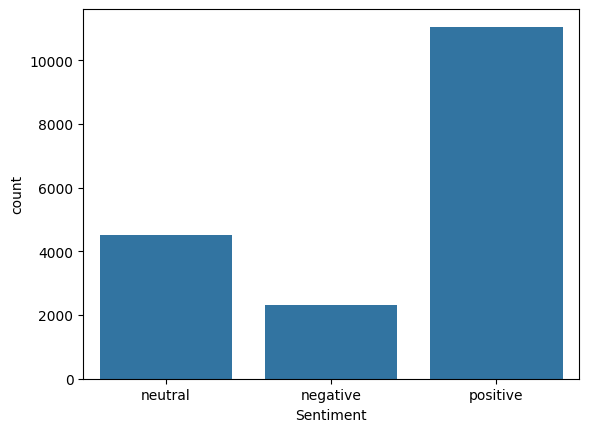

In [91]:
# Distribution of Labels
sns.countplot(data=df, x='Sentiment')

In [92]:
# Frequency distribution of sentiments
df['Sentiment'].value_counts(normalize=True).mul(100).round(2)

Sentiment
positive    61.84
neutral     25.19
negative    12.96
Name: proportion, dtype: float64

In [93]:
df['word_count'] = df['Comment'].apply(lambda x : len(x.split()))
df.head()

,Comment,Sentiment,word_count
0,lets not forget that apple pay in 2014 require...,neutral,57
1,here in nz 50 of retailers don’t even have con...,negative,29
2,i will forever acknowledge this channel with t...,positive,31
3,whenever i go to a place that doesn’t take app...,negative,83
4,apple pay is so convenient secure and easy to ...,positive,26


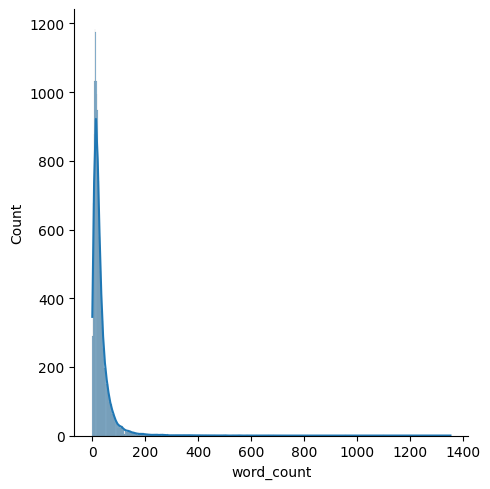

In [94]:
sns.displot(df['word_count'], kde=True)

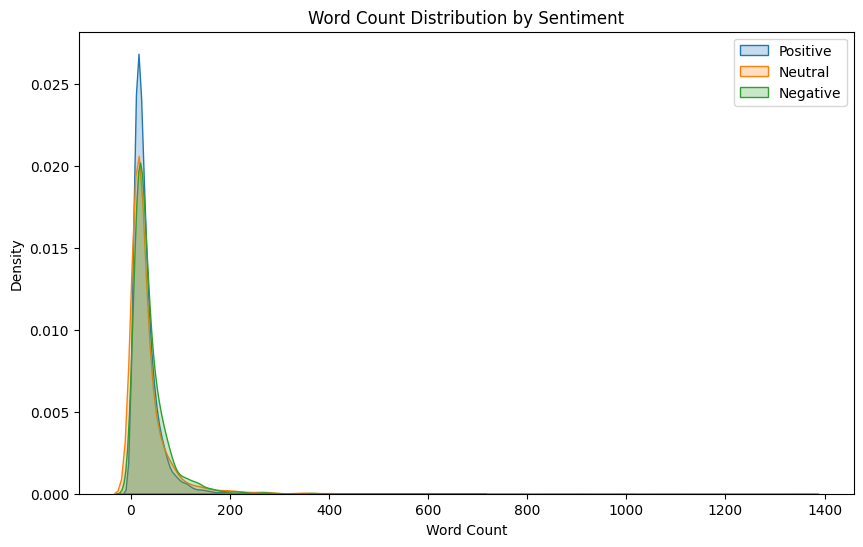

In [95]:
# Word count distribution of each categories
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['Sentiment'] == 'positive']['word_count'],label='Positive', fill=True )
sns.kdeplot(df[df['Sentiment'] == 'neutral']['word_count'],label='Neutral', fill=True )
sns.kdeplot(df[df['Sentiment'] == 'negative']['word_count'],label='Negative', fill=True )

plt.title("Word Count Distribution by Sentiment")
plt.xlabel("Word Count")
plt.ylabel("Density")

plt.legend()
plt.show()

- All 03 types of comments have similar distribution in this dataset, but positive has comparatively higher density.

<Axes: ylabel='word_count'>

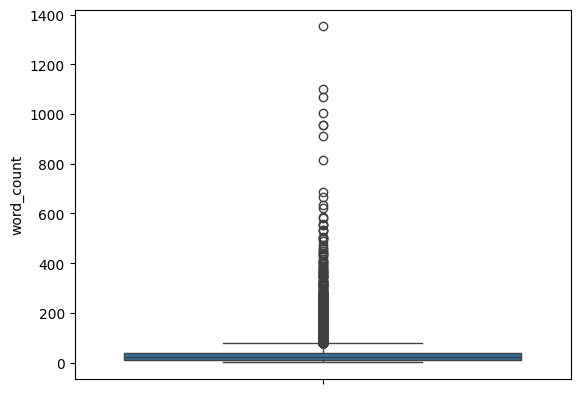

In [96]:
sns.boxplot(df['word_count'])

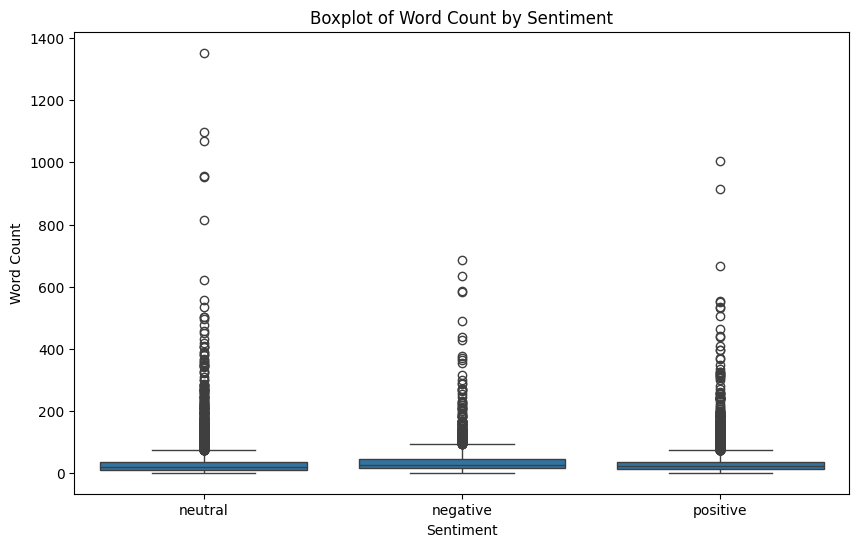

In [97]:
# Create a boxplot for the 'word_count' column catergorized by 'Sentiment'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='word_count')
plt.title("Boxplot of Word Count by Sentiment")
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

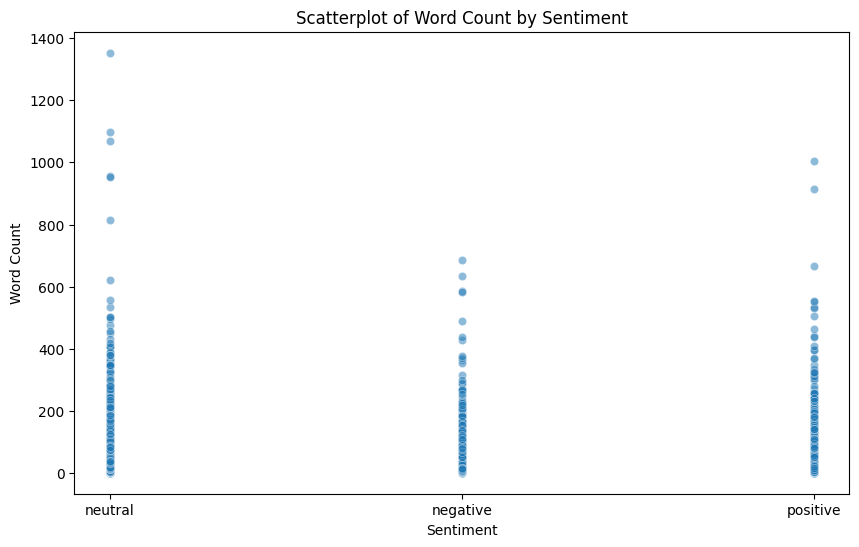

In [98]:
# Create a scatterplot between 'Sentiment' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sentiment', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='Sentiment', ylabel='word_count'>

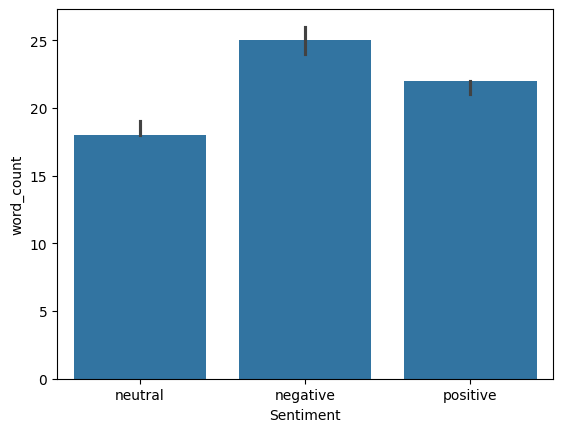

In [99]:
# median word counts among sentiments

sns.barplot(df,x='Sentiment',y='word_count',estimator='median')

In [100]:
!pip install nltk

In [101]:
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['Comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [103]:
df.sample(5)

,Comment,Sentiment,word_count,num_stop_words
9830,a cor roxa é muito linda adorei principalmente...,positive,46,3
13408,personally i think education or specifically a...,negative,378,197
16150,i love how wong is starting to pop up everywhe...,positive,57,29
4657,firouzja and pragganandhaa are both playing ve...,positive,28,15
10263,i have watched vikram vedha on youtube in hind...,positive,58,19


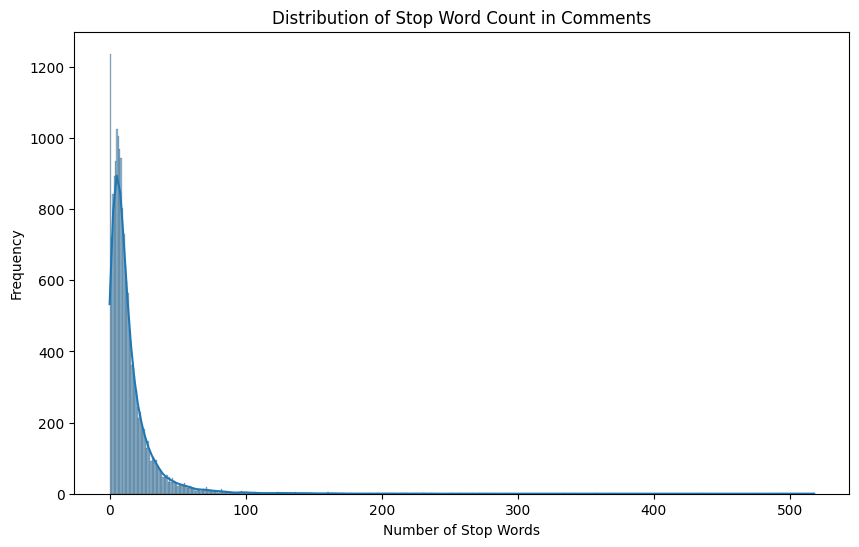

In [104]:
# Create a distribution plot (hisplot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


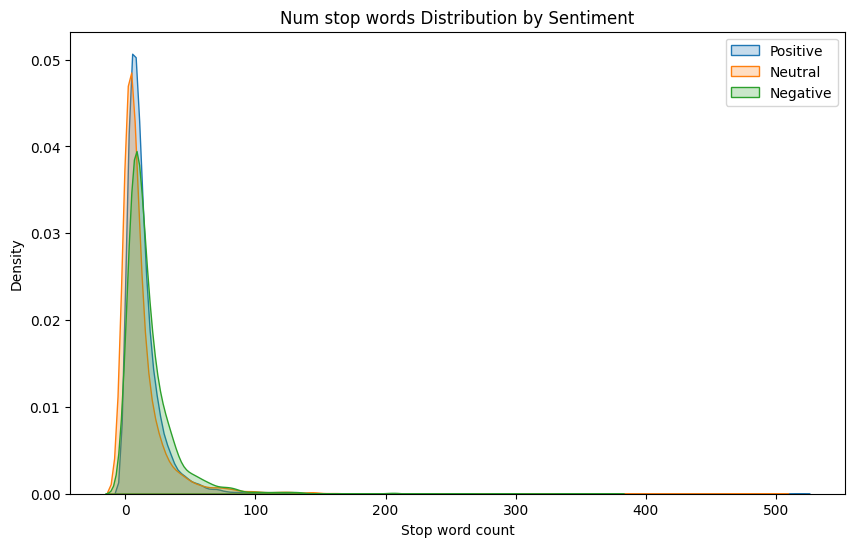

In [105]:
# DIstribution of Number of Stopwords by Sentiment
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['Sentiment'] == 'positive']['num_stop_words'], label='Positive', fill=True)
sns.kdeplot(df[df['Sentiment'] == 'neutral']['num_stop_words'], label='Neutral', fill=True)
sns.kdeplot(df[df['Sentiment'] == 'negative']['num_stop_words'], label='Negative', fill=True)

plt.title('Num stop words Distribution by Sentiment')
plt.xlabel('Stop word count')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: xlabel='Sentiment', ylabel='num_stop_words'>

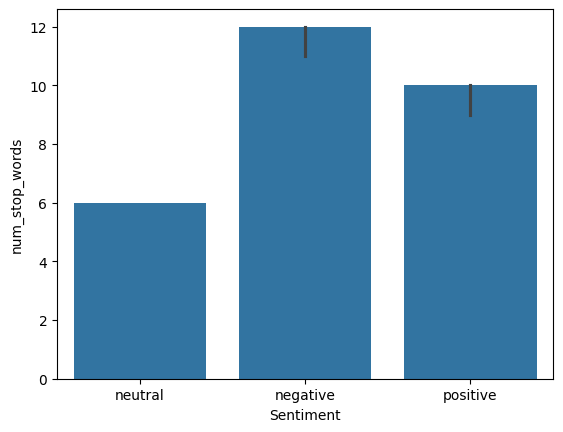

In [106]:
# median word counts among sentiments
sns.barplot(df,x='Sentiment',y='num_stop_words',estimator='median')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11836\3289972474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_30_df, x='count', y='stop_word', palette='viridis')


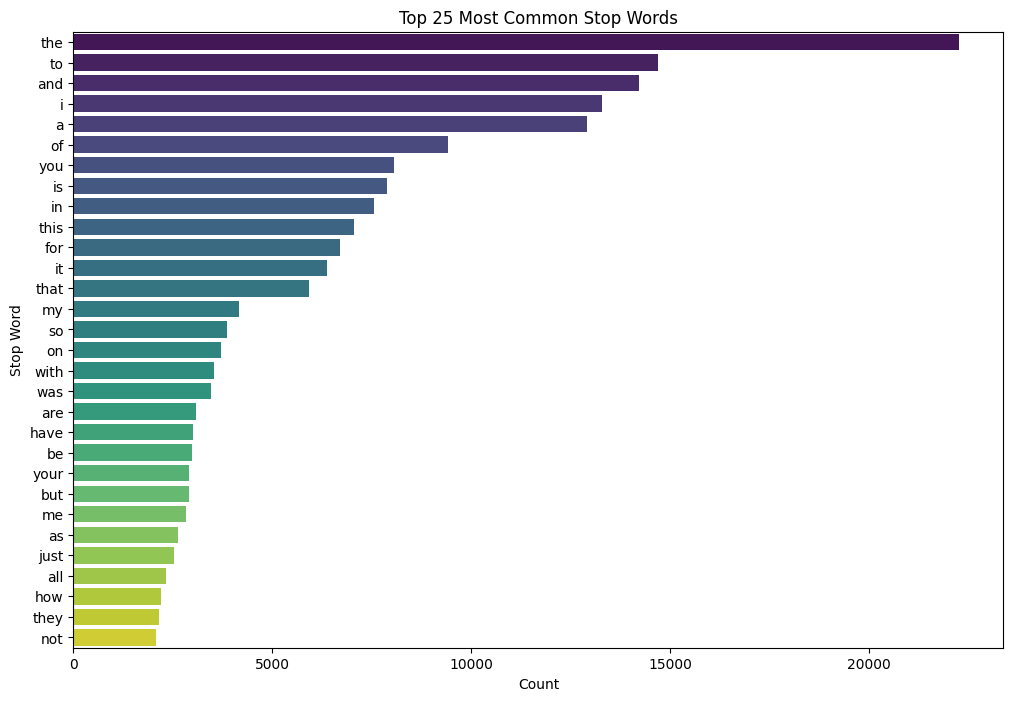

In [107]:
# Create a frequency distribution of stop words in the 'Comment' column
from collections import Counter


all_stop_words = [word for comment in df['Comment'] for word in comment.split() if word in stop_words]
most_common_stop_words = Counter(all_stop_words).most_common(30)
top_30_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 30 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_30_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [108]:
df['num_chars'] = df['Comment'].apply(len)
df.head()

,Comment,Sentiment,word_count,num_stop_words,num_chars
0,lets not forget that apple pay in 2014 require...,neutral,57,23,317
1,here in nz 50 of retailers don’t even have con...,negative,29,10,163
2,i will forever acknowledge this channel with t...,positive,31,16,183
3,whenever i go to a place that doesn’t take app...,negative,83,34,450
4,apple pay is so convenient secure and easy to ...,positive,26,12,135


In [109]:
df['num_chars'].describe()

count    17874.000000
mean       177.567976
std        252.165111
min          2.000000
25%         66.000000
50%        113.000000
75%        201.000000
max       7847.000000
Name: num_chars, dtype: float64

In [110]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['Comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)


In [111]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., 'ঞ', 'ণ', '法'], dtype=object)

In [112]:
char_frequency_df.tail(50)

,character,frequency
1825,斥,1
1826,着,1
435,𝑻,1
436,𝒉,1
438,𝑩,1
439,𝒖,1
441,𝒊,1
442,𝒏,1
1819,事,1
1820,实,1


In [113]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['Comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,Comment,Sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
3579,great content i feel those who would allow the...,positive,127,56,686,0
581,this video is not for children its shocking al...,negative,14,7,76,0
5701,i lost everything this year my house my relati...,positive,47,20,254,0
12147,i’m getting really scared for this sat i usual...,negative,25,10,118,0
4543,you made chess 2 this is brilliant,positive,7,3,34,0


In [114]:
df['num_punctuation_chars'].describe()

count    17874.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_11836\732692837.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


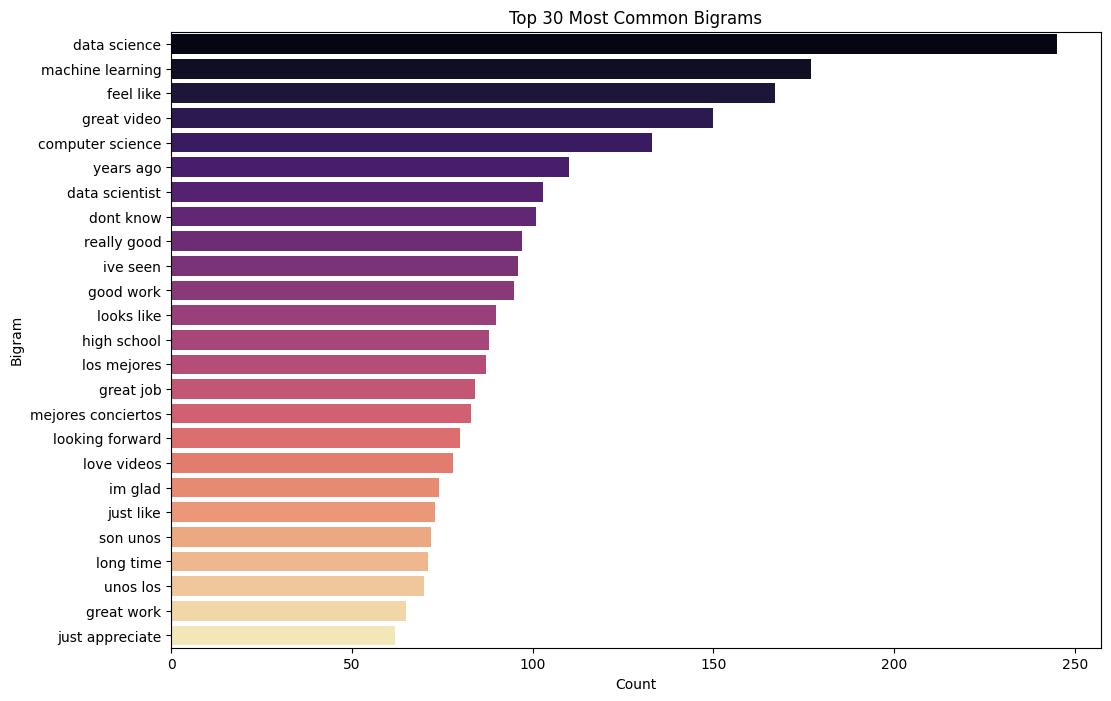

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 30 bigrams
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(
        ngram_range=(2,2),
        stop_words='english'
    ).fit(corpus)
    bow = vec.transform(corpus)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_30_bigrams = get_top_bigrams(df['Comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_30_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 30 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_11836\497584966.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_30_trigrams_df, x='count', y='trigram', palette='coolwarm')


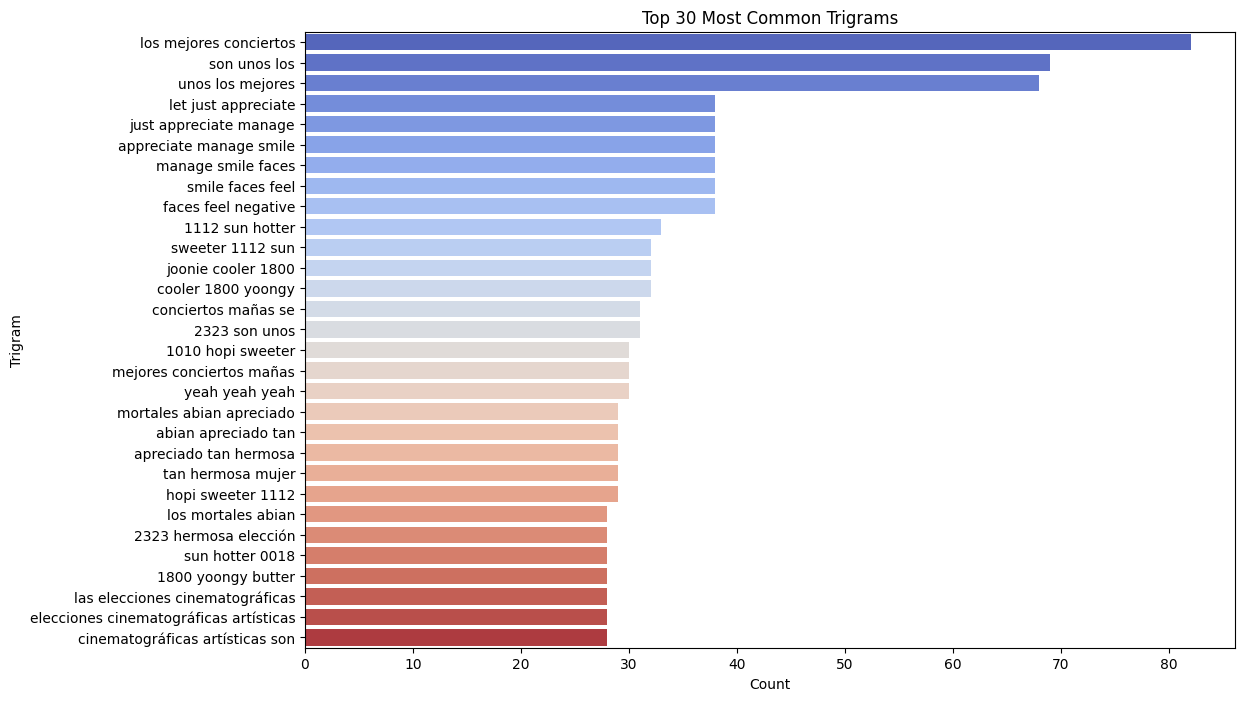

In [116]:
# Create a function to extract the top 30 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bow = vec.transform(corpus)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 30 trigrams
top_30_trigrams = get_top_trigrams(df['Comment'], 30)

# Convert the trigrams into a DataFrame for plotting
top_30_trigrams_df = pd.DataFrame(top_30_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 30 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_30_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 30 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [117]:
# Remove non-English characters from the 'Comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [118]:
all_text = ' '.join(df['Comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
4,,590996
1,e,301435
2,t,225325
11,a,207323
6,o,200811
14,i,192615
5,n,172531
3,s,168467
8,r,137793
10,h,120846


In [119]:
df.head()

,Comment,Sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
0,lets not forget that apple pay in 2014 require...,neutral,57,23,317,0
1,here in nz 50 of retailers dont even have cont...,negative,29,10,163,0
2,i will forever acknowledge this channel with t...,positive,31,16,183,0
3,whenever i go to a place that doesnt take appl...,negative,83,34,450,0
4,apple pay is so convenient secure and easy to ...,positive,26,12,135,0


In [120]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'Comment' column, retaining essential ones
df['Comment'] = df['Comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [121]:
df.head()

,Comment,Sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
0,lets not forget apple pay 2014 required brand ...,neutral,57,23,317,0
1,nz 50 retailers dont even contactless credit c...,negative,29,10,163,0
2,forever acknowledge channel help lessons ideas...,positive,31,16,183,0
3,whenever go place doesnt take apple pay doesnt...,negative,83,34,450,0
4,apple pay convenient secure easy use used kore...,positive,26,12,135,0


In [122]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'Comment_no_stopwords' column
df['Comment'] = df['Comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Comment,Sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
0,let not forget apple pay 2014 required brand n...,neutral,57,23,317,0
1,nz 50 retailer dont even contactless credit ca...,negative,29,10,163,0
2,forever acknowledge channel help lesson idea e...,positive,31,16,183,0
3,whenever go place doesnt take apple pay doesnt...,negative,83,34,450,0
4,apple pay convenient secure easy use used kore...,positive,26,12,135,0


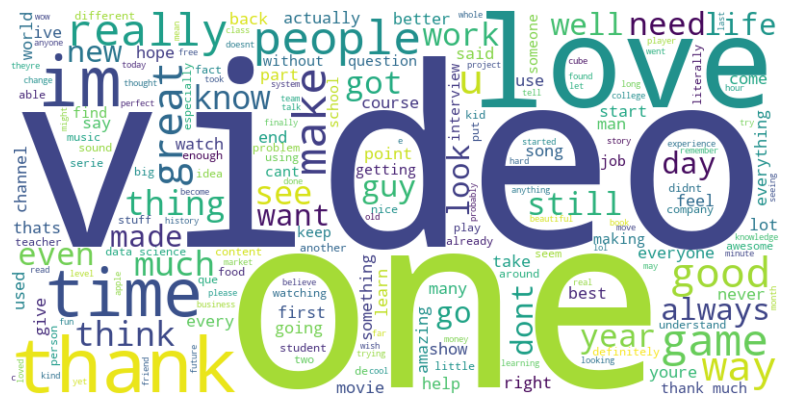

In [123]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['Comment'])

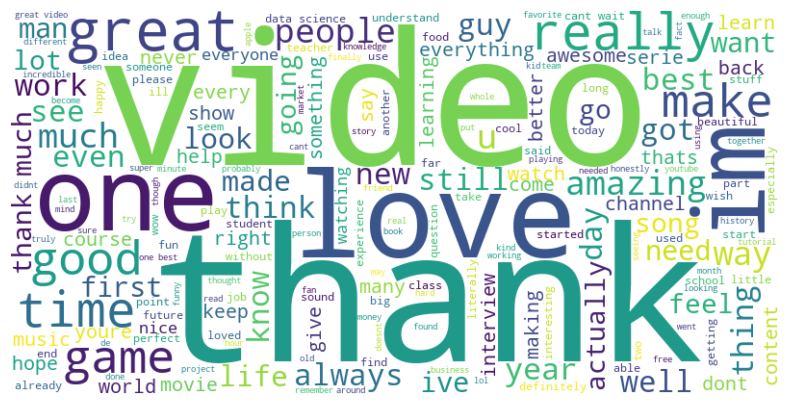

In [124]:
plot_word_cloud(df[df['Sentiment'] == "positive"]['Comment'])

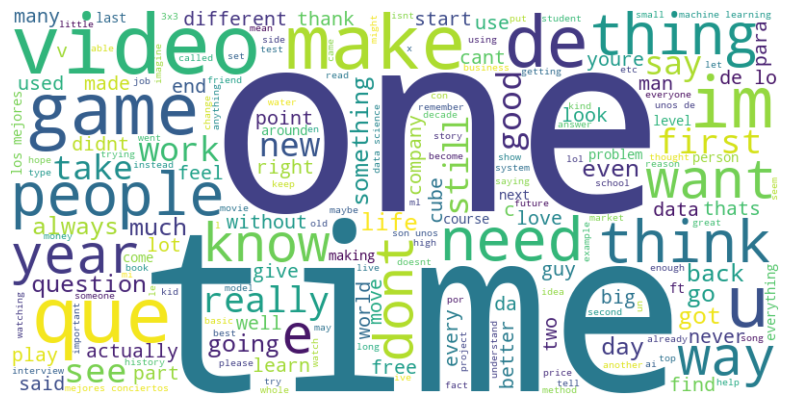

In [125]:
plot_word_cloud(df[df['Sentiment'] == "neutral"]['Comment'])

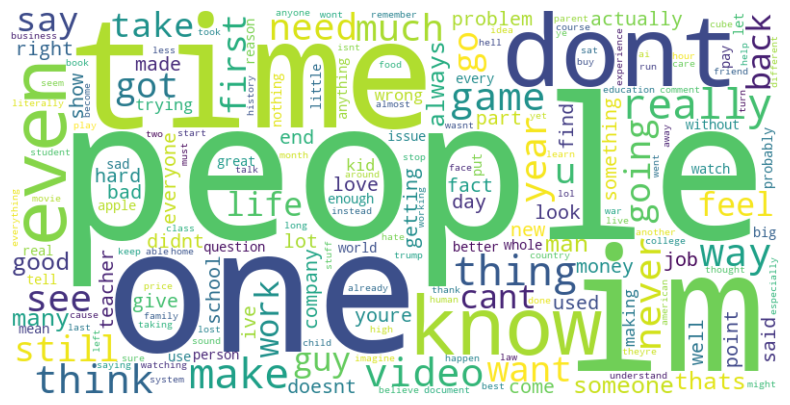

In [126]:
plot_word_cloud(df[df['Sentiment'] == "negative"]['Comment'])

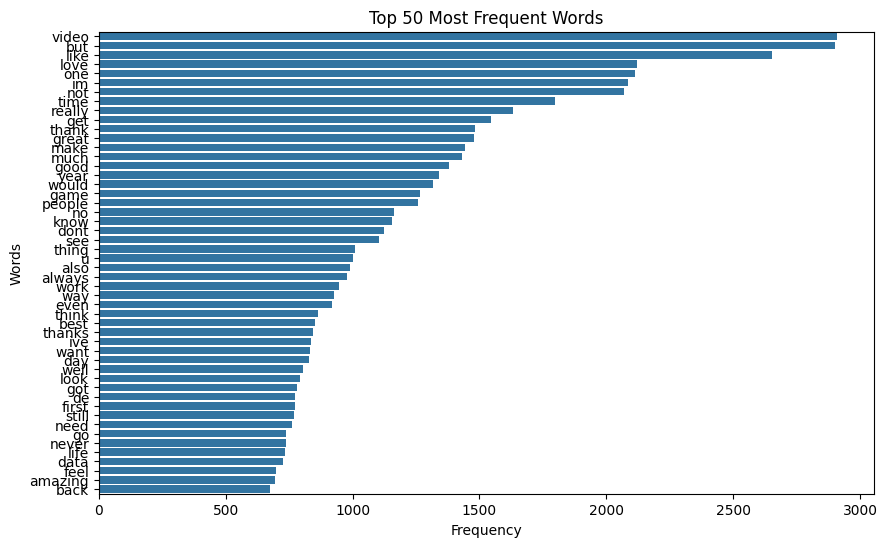

In [127]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['Comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


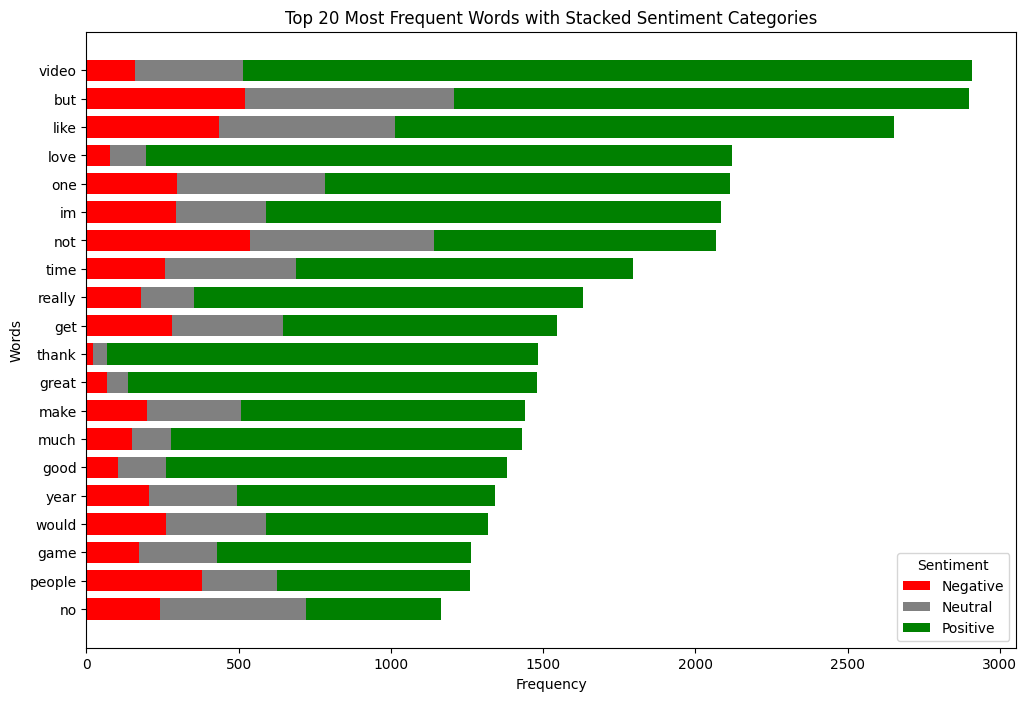

In [128]:
def plot_top_n_words_by_sentiment(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment."""
    # Flatten all words in the content column and count their occurrences by sentiment
    word_sentiment_counts = {}

    for idx, row in df.iterrows():
        words = row['Comment'].split()
        sentiment = row['Sentiment']  # Assuming 'sentiment' column exists for negative, neutral, positive labels

        for word in words:
            if word not in word_sentiment_counts:
                word_sentiment_counts[word] = { 'negative': 0, "neutral": 0, "positive": 0 }  # Initialize counts for each sentiment sentiment

            # Increment the count for the corresponding sentiment sentiment
            word_sentiment_counts[word][sentiment] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_sentiment_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_sentiment_counts[word]['negative'] for word in top_words]
    neutral_counts = [word_sentiment_counts[word]['neutral'] for word in top_words]
    positive_counts = [word_sentiment_counts[word]['positive'] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_sentiment(df, n=20)